In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/munged_salary_raptor.csv", index_col = [0])
df.drop(columns = ["war_reg_season", "war_playoffs", "lg", "pace_impact", "salary"])
df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,-0.039028,0.000000,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247,NBA,395000.0,0.033274
1,Alaa Abdelnaby,abdelal01,1991,RS,POR,614,290,-3.827204,-0.447001,-4.274205,-0.226163,-0.226163,0.000000,-3.776125,-1.592067,-5.368192,0.283274,NBA,395000.0,0.033274
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,-0.077215,0.000000,-0.077215,-5.722269,-4.144577,-9.866847,1.216643,NBA,494000.0,0.039520
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,0.070322,0.070322,0.000000,-2.416858,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,-0.381918,0.000000,-0.381918,-9.480059,-4.481334,-13.961393,0.456135,NBA,500000.0,0.035714


### Plot Average Normalized Salary Cap Over Time
---
Average normalized salary by team over time

In [3]:
teams = pd.read_table("../Data/NBA_teams.txt", sep = "\t")
teams = pd.read_table("../Data/NBA_teams.txt", sep = "\t")
team_to_abr = dict(zip(teams["Franchise"], teams["Abbreviation/Acronym"]))

div_team = {'Atlantic' : ["BOS", "PHI", "TOR", "NYK", "BKN"], 
             'Central' : ["MIL", "CHI", "CLE", "DET", "IND"], 
             'Southeast' : ["MIA", "ATL", "CHA", "WAS", "ORL"], 
             'Northwest' : ["DEN", "UTA", "MIN" , "POR", "OKC"], 
             'Pacific' : ["GSW", "PHX", "LAL" , "LAC", "SAC"],
             'Southwest' : ["MEM", "SAS", "DAL" , "HOU", "NOP"]
            }
team_to_div = dict()
for k,v in div_team.items():
    for team in v:
        team_to_div.update({team:k})
team_to_div
divs = [""]* df.shape[0]

for i in range(df.shape[0]):
    divs[i] = team_to_div[df["team"].values[i]]
df["division"] = divs
df.head()


,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary,division
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,...,0.000000,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247,NBA,395000.0,0.033274,Northwest
1,Alaa Abdelnaby,abdelal01,1991,RS,POR,614,290,-3.827204,-0.447001,-4.274205,...,-0.226163,0.000000,-3.776125,-1.592067,-5.368192,0.283274,NBA,395000.0,0.033274,Northwest
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,...,0.000000,-0.077215,-5.722269,-4.144577,-9.866847,1.216643,NBA,494000.0,0.039520,Northwest
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,...,0.070322,0.000000,-2.416858,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520,Northwest
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,...,0.000000,-0.381918,-9.480059,-4.481334,-13.961393,0.456135,NBA,500000.0,0.035714,Atlantic


In [4]:
df["season-eW"] = pd.cut(df["season"], bins = 4)
df["season-eF"] = pd.qcut(df["season"], q = 4)

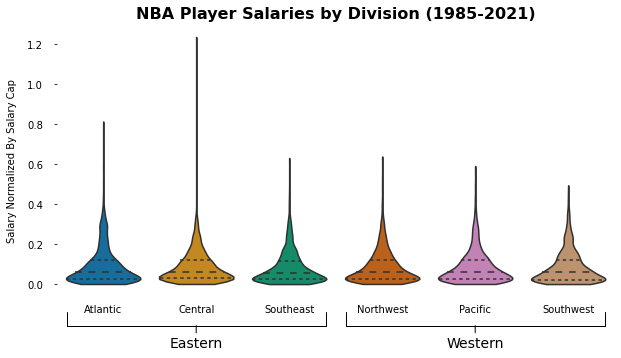

In [48]:
div_order = ["Atlantic", "Central", "Southeast", "Northwest", "Pacific", "Southwest"]
fig = plt.figure(figsize = (10,5))
ax =sns.violinplot(data = df[df["season_type"] == "RS"], x ="division", y = "normalized salary", 
               cut = 0, inner = "quartiles", order = div_order, scale = "width", palette = "colorblind")
# ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 90)
ax.tick_params(axis = "x", pad=5, which='both', bottom = False)
ax.tick_params(axis = "y", pad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("Salary Normalized By Salary Cap", labelpad = 10)
ax.set_title("NBA Player Salaries by Division (1985-2021)", size = 16, style = "normal", weight = "bold")
fs = 14

ax.annotate('Eastern', xy=(0.25, -.1), xytext=(0.25, -.2), xycoords='axes fraction', 
            fontsize=fs*1, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=9.25, lengthB=1', lw=1))
ax.annotate('Western', xy=(0.75, -.1), xytext=(0.75, -.2), xycoords='axes fraction', 
            fontsize=fs*1, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=9.25, lengthB=1', lw=1))

plt.savefig("ManneY_1.png", dpi = 400, bbox_inches = "tight")

https://stackoverflow.com/questions/35320437/drawing-brackets-over-plot


Jordan's outrageous salary during the last dance since there were no laws against paying past the salary cap.

https://fivethirtyeight.com/features/michael-jordan-made-bank-during-the-bulls-last-dance/#:~:text=Jordan%20had%20earned%20a%20combined,precedent%20after%20adjusting%20for%20inflation.


In [6]:
df.iloc[np.argmax(df["normalized salary"])] 

player_name            Michael Jordan
player_id                   jordami01
season                           1997
season_type                        PO
team                              CHI
poss                             1449
mp                                804
raptor_offense               5.804664
raptor_defense               2.129794
raptor_total                 7.934458
war_total                    4.502755
war_reg_season                    0.0
war_playoffs                 4.502755
predator_offense             6.074194
predator_defense             2.162149
predator_total               8.236343
pace_impact                 -0.340903
lg                                NBA
salary                     30140000.0
normalized salary            1.237122
division                      Central
season-eW            (1994.0, 2003.0]
season-eF            (1996.0, 2006.0]
Name: 10289, dtype: object

In [7]:
np.sort(df["season"].unique()) # missing all data for 1999-2000 data

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [8]:
2021-1985

36

### Raptor Offensive v Raptor Defensive
---

In [9]:
rs = df[df["season_type"] == "RS"]

In [10]:
rs.shape

(11859, 23)

In [11]:
rs[rs["mp"] > 500].shape # 82 games * 10 mins

(10277, 23)

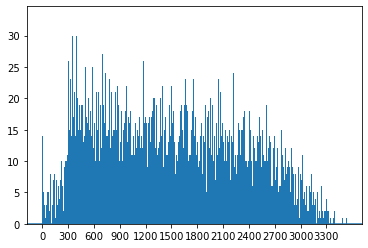

In [12]:
_ = plt.hist(rs["mp"], bins = 1000)
plt.xticks(np.arange(0,3500,300))
plt.axhline()

In [13]:
# quantiles of normalized salary doesn't make sense since they're all approximately the same thing.
np.quantile(rs[rs["normalized salary"]>0]["normalized salary"], np.arange(0,1,0.1))

array([1.67784115e-04, 1.39085670e-02, 2.10730825e-02, 3.19038483e-02,
       4.37613595e-02, 5.89435009e-02, 7.81412854e-02, 1.04537262e-01,
       1.38793594e-01, 2.02225378e-01])

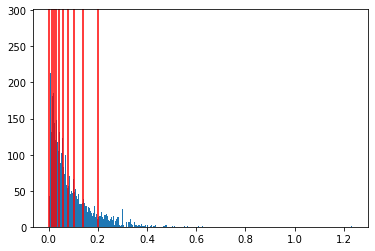

In [14]:
_ = plt.hist(rs["normalized salary"], bins = 1000)
for quantile in np.quantile(rs[rs["normalized salary"]>0]["normalized salary"], np.arange(0,1, 0.10)):
    plt.axvline(quantile, c = "Red")
# print(np.mean(rs[rs["normalized salary"]>0]["normalized salary"]))
#plt.xticks(np.arange(0,3500,300))

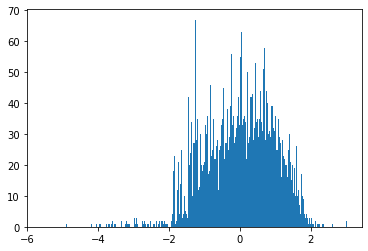

In [15]:
_ = plt.hist((np.log10(rs["normalized salary"].values) - np.mean(np.log10(rs["normalized salary"].values)))/np.std(np.log10(rs["normalized salary"].values)), bins = 1000)
#plt.axvline(np.mean(rs[rs["normalized salary"]>0]["normalized salary"]), c = "Red")
#print(np.mean(rs[rs["normalized salary"]>0]["normalized salary"]))
#plt.xticks(np.arange(0,3500,300))

In [16]:
filtered_df = rs[(rs["mp"] > 300) & (rs["normalized salary"]>0)]
filtered_df.shape
# Z-score of log-transform of salary/league's salary cap at the time
filtered_df["normSalary"] = (np.log10(filtered_df["normalized salary"].values) - np.mean(np.log10(filtered_df["normalized salary"].values)))/np.std(np.log10(filtered_df["normalized salary"].values))

/tmp/local/51409472/ipykernel_24492/1606296115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["normSalary"] = (np.log10(filtered_df["normalized salary"].values) - np.mean(np.log10(filtered_df["normalized salary"].values)))/np.std(np.log10(filtered_df["normalized salary"].values))


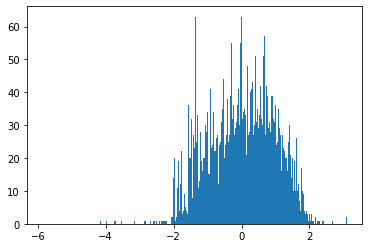

In [17]:
_ = plt.hist(filtered_df["normSalary"], bins = 1000)

In [18]:
print(np.mean(filtered_df["mp"]),np.median(filtered_df["mp"]))
print(np.mean(rs["mp"]),np.median(rs["mp"]))

1550.355057765235 1495.0
1489.8132220254658 1433.0


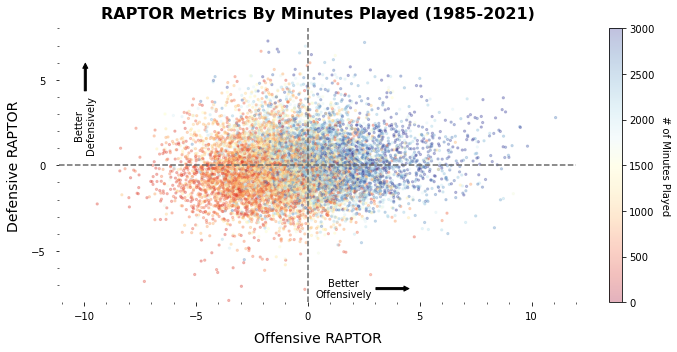

In [140]:
from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize = (10,5))
plt.scatter(filtered_df["raptor_offense"], filtered_df["raptor_defense"],
                alpha = 0.3, s= 5, c = filtered_df["mp"], vmin = 0, vmax = 3000, cmap = "RdYlBu")
plt.xlim(-11.1,12)
plt.ylim(-8,8)
ax = plt.gca()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax.tick_params(axis = "x", pad=5, which='both')

ax.set_yticks(np.arange(-5,8,5))
ax.set_xticks(np.arange(-10,12,5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.tick_params(axis = "y", pad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Offensive RAPTOR", size =14, labelpad = 10)
ax.set_ylabel("Defensive RAPTOR", size =14,labelpad = 10)
plt.title("RAPTOR Metrics By Minutes Played (1985-2021)", size = 16, pad = 10, style = "normal", weight = "bold")

plt.axhline(0, ls = "--", linewidth = 1.5, color = "dimgrey")
plt.axvline(0, ls = "--", linewidth = 1.5, color = "dimgrey")
plt.annotate("Better\nDefensively", xy=(0.05, 0.88), xytext=(0.05, 0.65), xycoords='axes fraction',
             fontsize = 10, ha='center', va='center', rotation = 90,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))

plt.annotate("Better\nOffensively", xy=(0.68, 0.05), xytext=(0.55, 0.05), xycoords='axes fraction',
             fontsize = 10, ha='center', va='center', rotation = 0,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('# of Minutes Played', rotation=270)
plt.tight_layout()
plt.savefig("ManneY_2-1.png", dpi = 400, bbox_inches = "tight")

import scipy.stats
from scipy.stats import invgauss
def _forward(x):
    a = scipy.stats.norm()
    return a.pdf(x)
def _inverse(x):
    return invgauss.pdf(x, mu= 0)
from matplotlib import colors
norm = colors.FuncNorm((_forward, _inverse), vmin=-3, vmax=3)

In [20]:
# filter out middle 1.8 SD on either side of mean.
lim = 1.8
back_maskh = filtered_df["normSalary"] < lim 
back_maskl = filtered_df["normSalary"] > -lim
print(np.mean(back_maskl & back_maskh))
print(np.mean(~back_maskh))
print(np.mean(~back_maskl))



0.9502601640356293
0.013316870976276568
0.036422964988094185


0.8755622188905547
0.05573683746362113
0.06870094364582414


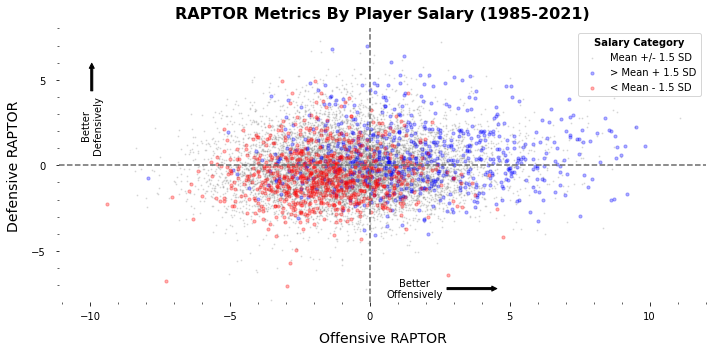

In [137]:
# filter out +/- __ SD of mean
lim = 1.5
back_maskh = filtered_df["normSalary"] < lim 
back_maskl = filtered_df["normSalary"] > -lim
print(np.mean(back_maskl & back_maskh))
print(np.mean(~back_maskh))
print(np.mean(~back_maskl))

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize = (10,5))
plt.scatter(filtered_df[back_maskl & back_maskh]["raptor_offense"], 
            filtered_df[back_maskl & back_maskh]["raptor_defense"], alpha = 0.2, 
            c = "grey", s = 1, label = f"Mean +/- {lim} SD")
plt.scatter(filtered_df[~back_maskh]["raptor_offense"], 
            filtered_df[~back_maskh]["raptor_defense"], alpha = 0.3, 
            c = "blue", s= 10, label = f"> Mean + {lim} SD")
plt.scatter(filtered_df[~back_maskl]["raptor_offense"], 
            filtered_df[~back_maskl]["raptor_defense"], alpha = 0.3, 
            c = "red", s= 10, label = f"< Mean - {lim} SD")

#, cmap = "RdYlBu", vmin = -5, vmax = 5)
# scatter = sns.scatterplot(data = filtered_df, x = "raptor_offense", y = "raptor_defense", alpha = 0.3)
plt.xlim(-11.1,12)
plt.ylim(-8,8)
ax = plt.gca()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
leg = plt.legend(loc= "upper right", frameon =True)
leg.set_title("Salary Category", prop = dict(weight = "bold"))

ax.tick_params(axis = "x", pad=5, which='both')

ax.set_yticks(np.arange(-5,8,5))
ax.set_xticks(np.arange(-10,12,5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.tick_params(axis = "y", pad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Offensive RAPTOR", size =14, labelpad = 10)
ax.set_ylabel("Defensive RAPTOR", size =14,labelpad = 10)
plt.title("RAPTOR Metrics By Player Salary (1985-2021)", size = 16, pad = 10, style = "normal", weight = "bold")

plt.axhline(0, ls = "--", linewidth = 1.5, color = "dimgrey")
plt.axvline(0, ls = "--", linewidth = 1.5, color = "dimgrey")
plt.annotate("Better\nDefensively", xy=(0.05, 0.88), xytext=(0.05, 0.65), xycoords='axes fraction',
             fontsize = 10, ha='center', va='center', rotation = 90,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))

plt.annotate("Better\nOffensively", xy=(0.68, 0.05), xytext=(0.55, 0.05), xycoords='axes fraction',
             fontsize = 10, ha='center', va='center', rotation = 0,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))
# plt.colorbar()
plt.tight_layout()
plt.savefig("ManneY_2-2a.png", dpi = 400, bbox_inches = "tight")

0.8999911808801482
0.05000440955992592
0.05000440955992592


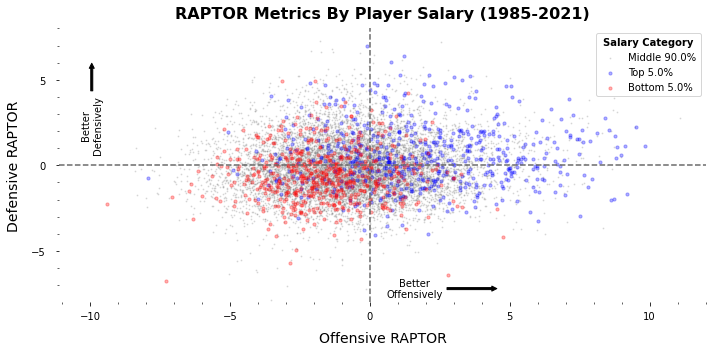

In [136]:

# filter out middle __% 
middle = 0.90
middle_maskl = filtered_df["normalized salary"] > np.quantile(filtered_df["normalized salary"], (1-middle)/2)
middle_maskh = filtered_df["normalized salary"] < np.quantile(filtered_df["normalized salary"], 1-((1-middle)/2))
print(np.mean(middle_maskl & middle_maskh))
print(np.mean(~middle_maskh))
print(np.mean(~middle_maskl))

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize = (10,5))
plt.scatter(filtered_df[middle_maskl & middle_maskh]["raptor_offense"], 
            filtered_df[middle_maskl & middle_maskh]["raptor_defense"], alpha = 0.2, 
            c = "grey", s = 1, label = "Middle {:.1%}".format(middle))
plt.scatter(filtered_df[~middle_maskh]["raptor_offense"], 
            filtered_df[~middle_maskh]["raptor_defense"], alpha = 0.3, 
            c = "blue", s = 10, label = "Top {:.1%}".format((1-middle)/2))
plt.scatter(filtered_df[~middle_maskl]["raptor_offense"], 
            filtered_df[~middle_maskl]["raptor_defense"], alpha = 0.3, 
            c = "red", s = 10, label = "Bottom {:.1%}".format((1-middle)/2))

#, cmap = "RdYlBu", vmin = -5, vmax = 5)
# scatter = sns.scatterplot(data = filtered_df, x = "raptor_offense", y = "raptor_defense", alpha = 0.3)
plt.xlim(-11.1,12)
plt.ylim(-8,8)
ax = plt.gca()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
leg = plt.legend(loc= "upper right", frameon =True)
leg.set_title("Salary Category", prop = dict(weight = "bold"))
ax.tick_params(axis = "x", pad=5, which='both')

ax.set_yticks(np.arange(-5,8,5))
ax.set_xticks(np.arange(-10,12,5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.tick_params(axis = "y", pad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Offensive RAPTOR", size =14, labelpad = 10)
ax.set_ylabel("Defensive RAPTOR", size =14,labelpad = 10)
plt.title("RAPTOR Metrics By Player Salary (1985-2021)", size = 16, pad = 10, style = "normal", weight = "bold")

plt.axhline(0, ls = "--", linewidth = 1.5, color = "dimgrey")
plt.axvline(0, ls = "--", linewidth = 1.5, color = "dimgrey")
plt.annotate("Better\nDefensively", xy=(0.05, 0.88), xytext=(0.05, 0.65), xycoords='axes fraction',
             fontsize = 10, ha='center', va='center', rotation = 90,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))

plt.annotate("Better\nOffensively", xy=(0.68, 0.05), xytext=(0.55, 0.05), xycoords='axes fraction',
             fontsize = 10, ha='center', va='center', rotation = 0,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))
# plt.colorbar()
plt.tight_layout()
plt.savefig("ManneY_2-2b.png", dpi = 400, bbox_inches = "tight")

In [23]:
#Attempt at using Facet Grid
# filtered_df["binned_mp"] = pd.qcut(filtered_df["mp"], q = 3)
# filtered_df["binned_sal"] = pd.qcut(filtered_df["normalized salary"], q = 3)

# from matplotlib.ticker import AutoMinorLocator
# fig = plt.figure(figsize = (10,5))
# g = sns.FacetGrid(filtered_df,col = "binned_mp", hue = "normalized salary")
# g.map_dataframe(sns.scatterplot, x = "raptor_offense", y = "raptor_defense",
#                 alpha = 0.3)

# for (row_val, col_val), ax in g.axes_dict.items():
#     ax.set_xlim(-11.1,12)
#     ax.set_ylim(-8,8)

#     # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
#     ax.tick_params(axis = "x", pad=5, which='both')

#     ax.set_yticks(np.arange(-5,8,5))
#     ax.set_xticks(np.arange(-10,12,5))
#     ax.xaxis.set_minor_locator(AutoMinorLocator())
#     ax.yaxis.set_minor_locator(AutoMinorLocator(5))

#     ax.tick_params(axis = "y", pad=10)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.set_xlabel("Offensive RAPTOR", labelpad = 10)
#     ax.set_ylabel("Defensive RAPTOR", labelpad = 10)
# plt.suptitle("NBA Player Salaries by RAPTOR & Minutes Played", size = 12, style = "normal", weight = "bold")
# #plt.savefig("ManneY_draft2.png", dpi = 400, bbox_inches = "tight")
# #plt.tight_layout()

### Distributions based on Season
---

In [24]:
filtered_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_defense,predator_total,pace_impact,lg,salary,normalized salary,division,season-eW,season-eF,normSalary
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,...,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520,Northwest,"(1984.964, 1994.0]","(1984.999, 1996.0]",-0.373879
5,Alaa Abdelnaby,abdelal01,1993,RS,BOS,2304,1152,-1.845659,-2.038480,-3.884140,...,-1.907295,-3.711713,0.444865,NBA,500000.0,0.035714,Atlantic,"(1984.964, 1994.0]","(1984.999, 1996.0]",-0.475815
8,Alaa Abdelnaby,abdelal01,1995,RS,SAC,926,476,-2.870680,-0.987076,-3.857756,...,-0.608234,-3.447366,1.665034,NBA,650000.0,0.040717,Pacific,"(1994.0, 2003.0]","(1984.999, 1996.0]",-0.343849
10,Kareem Abdul-Jabbar,abdulka01,1985,RS,LAL,5719,2630,2.454328,1.652245,4.106573,...,1.384436,4.266298,-0.393307,NBA,1530000.0,0.425000,Pacific,"(1984.964, 1994.0]","(1984.999, 1996.0]",2.017354
12,Kareem Abdul-Jabbar,abdulka01,1986,RS,LAL,5690,2629,2.410467,1.386890,3.797357,...,1.144890,4.069764,-0.310083,NBA,2030000.0,0.479565,Pacific,"(1984.964, 1994.0]","(1984.999, 1996.0]",2.138956


(5819, 23)


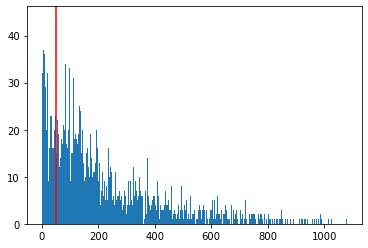

In [25]:
filtered_ps = df[df["season_type"] == "PO"]
print(filtered_ps.shape)
_ =plt.hist(filtered_ps["mp"], bins = 1000)
plt.axvline(50, c ="red")

(4693, 23)


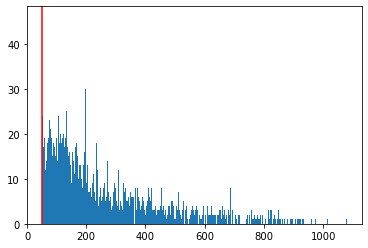

In [26]:
filtered_ps = filtered_ps[(filtered_ps["mp"] > 50) & (filtered_ps["normalized salary"]>0)]
print(filtered_ps.shape)
_ =plt.hist(filtered_ps["mp"], bins = 1000)
plt.axvline(50, c ="red")

In [27]:
filtered_ps["normSalary"] = (np.log10(filtered_ps["normalized salary"].values) - np.mean(np.log10(filtered_ps["normalized salary"].values)))/np.std(np.log10(filtered_ps["normalized salary"].values))

In [28]:
new_df = pd.concat([filtered_df,filtered_ps])

In [29]:
new_df

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_defense,predator_total,pace_impact,lg,salary,normalized salary,division,season-eW,season-eF,normSalary
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,...,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520,Northwest,"(1984.964, 1994.0]","(1984.999, 1996.0]",-0.373879
5,Alaa Abdelnaby,abdelal01,1993,RS,BOS,2304,1152,-1.845659,-2.038480,-3.884140,...,-1.907295,-3.711713,0.444865,NBA,500000.0,0.035714,Atlantic,"(1984.964, 1994.0]","(1984.999, 1996.0]",-0.475815
8,Alaa Abdelnaby,abdelal01,1995,RS,SAC,926,476,-2.870680,-0.987076,-3.857756,...,-0.608234,-3.447366,1.665034,NBA,650000.0,0.040717,Pacific,"(1994.0, 2003.0]","(1984.999, 1996.0]",-0.343849
10,Kareem Abdul-Jabbar,abdulka01,1985,RS,LAL,5719,2630,2.454328,1.652245,4.106573,...,1.384436,4.266298,-0.393307,NBA,1530000.0,0.425000,Pacific,"(1984.964, 1994.0]","(1984.999, 1996.0]",2.017354
12,Kareem Abdul-Jabbar,abdulka01,1986,RS,LAL,5690,2629,2.410467,1.386890,3.797357,...,1.144890,4.069764,-0.310083,NBA,2030000.0,0.479565,Pacific,"(1984.964, 1994.0]","(1984.999, 1996.0]",2.138956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20910,Tyler Zeller,zellety01,2017,PO,BOS,161,78,-1.162489,-2.759670,-3.922159,...,-5.249854,-8.936093,-0.177350,NBA,8000000.0,0.084977,Atlantic,"(2012.0, 2021.0]","(2014.0, 2021.0]",0.145907
20912,Tyler Zeller,zellety01,2018,PO,MIL,128,66,-2.864168,-2.823885,-5.688053,...,-4.329279,-5.418168,0.463779,NBA,1709538.0,0.017252,Central,"(2012.0, 2021.0]","(2014.0, 2021.0]",-1.487923
20921,Paul Zipser,zipsepa01,2017,PO,CHI,263,136,-3.201362,-2.041886,-5.243247,...,-3.486386,-8.059600,-0.751814,NBA,750000.0,0.007967,Central,"(2012.0, 2021.0]","(2014.0, 2021.0]",-2.279661
20930,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,...,4.062312,2.283933,-0.401691,NBA,6481482.0,0.059387,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]",-0.221249


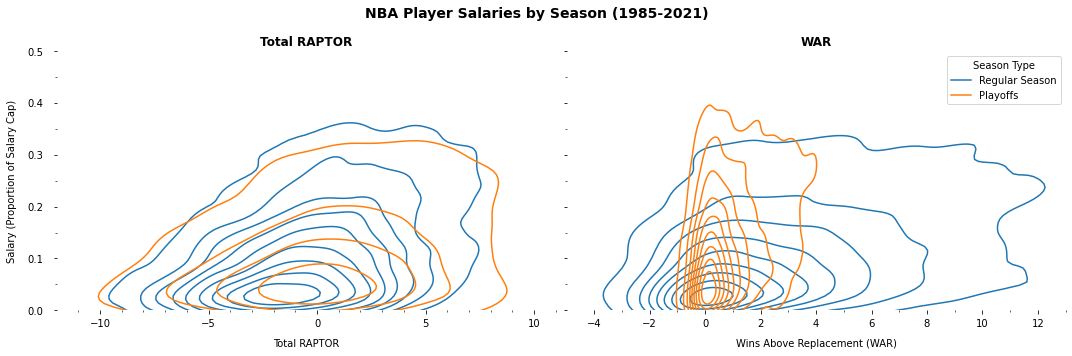

In [30]:
fig, ax = plt.subplots(1,2, sharey = True, figsize = (15,5))
sns.kdeplot(ax = ax[0],data = new_df, x = "raptor_total", y="normalized salary", hue = "season_type", legend=False)
ax[0].set_xlim(-12,11)
ax[0].set_ylim(0,0.5)
# ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax[0].set_xticks(np.arange(-10,12,5))
ax[0].tick_params(axis = "x", pad=5, which='both')
ax[0].tick_params(axis = "y", pad=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel("Total RAPTOR", labelpad = 10)
ax[0].set_ylabel("Salary (Proportion of Salary Cap)", labelpad = 10)
ax[0].set_title("Total RAPTOR", size = 12, style = "normal", weight = "bold")
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))


g1 = sns.kdeplot(ax = ax[1],data = new_df, x = "war_total", y="normalized salary", hue = "season_type")
ax[1].set_xlim(-5,13)
ax[1].set_ylim(0,0.5)
# ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax[1].tick_params(axis = "x", pad=5, which='both')
ax[1].tick_params(axis = "y", pad=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel("Wins Above Replacement (WAR)", labelpad = 10)
ax[1].set_ylabel("Salary (Proportion of Salary Cap)", labelpad = 10)
ax[1].set_title("WAR", size = 12, style = "normal", weight = "bold")
ax[1].xaxis.set_minor_locator(AutoMinorLocator(2))
# ax[1].yaxis.set_minor_locator(AutoMinorLocator(2))

plt.suptitle("NBA Player Salaries by Season (1985-2021)", size = 14, style = "normal", weight = "bold")
# plt.legend(title="Season Type", loc='best', labels=['Regular Season', 'Playoffs'])
leg = g1.legend_
leg.set_title("Season Type")
new_labels = ["Regular Season", "Playoffs"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
plt.savefig("ManneY_3.png", dpi = 400, bbox_inches = "tight")
plt.tight_layout()

In [122]:
np.median(filtered_df["war_total"])

1.304090624

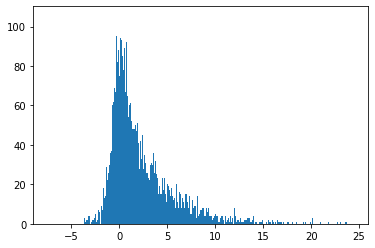

In [120]:
_= plt.hist(filtered_df["war_total"], bins=1000)

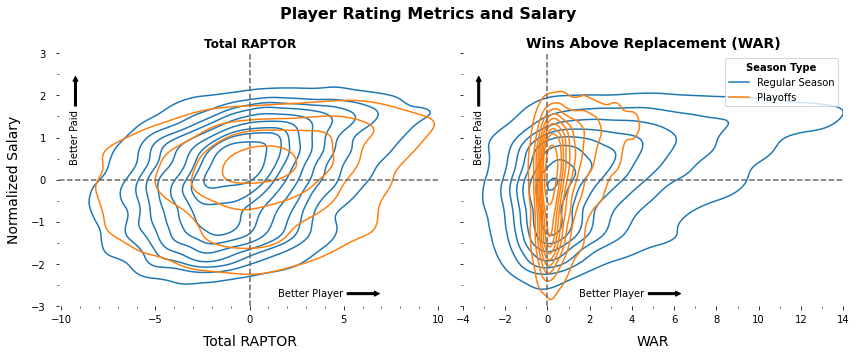

In [144]:
fig, ax = plt.subplots(1,2, sharey = True, figsize = (12,5))
sns.kdeplot(ax = ax[0],data = new_df, x = "raptor_total", y="normSalary", hue = "season_type", legend=False)
ax[0].set_xlim(-10.1,10.1)
ax[0].set_ylim(-3,3)
# ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax[0].set_xticks(np.arange(-10,12,5))
ax[0].tick_params(axis = "x", pad=5, which='both')
ax[0].tick_params(axis = "y", pad=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel("Total RAPTOR", labelpad = 10, size = 14)
ax[0].set_ylabel("Normalized Salary", labelpad = 10, size = 14)
ax[0].set_title("Total RAPTOR", size = 12, style = "normal", weight = "bold")
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].axhline(0, ls = "--", linewidth = 1.5, color = "dimgrey")
ax[0].axvline(0, ls = "--", linewidth = 1.5, color = "dimgrey")
ax[0].annotate("Better Paid", xy=(-9.25, 2.5), xytext=(-9.25, 1), xycoords='data',
             fontsize = 10, ha='center', va='center', rotation = 90,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))
ax[0].annotate("Better Player", xy=(7, -2.7), xytext=(1.5, -2.7), xycoords='data',
             fontsize = 10, ha='left', va='center', rotation = 0,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))


g1 = sns.kdeplot(ax = ax[1],data = new_df, x = "war_total", y="normSalary", hue = "season_type")
ax[1].set_xlim(-4,14)
# ax[1].set_ylim(0,0.5)
# ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax[1].tick_params(axis = "x", pad=5, which='both')
ax[1].tick_params(axis = "y", pad=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel("WAR", labelpad = 10, size = 14)
ax[1].set_ylabel("Normalized Salary", labelpad = 10, size = 14)
ax[1].set_title("Wins Above Replacement (WAR)", size = 14, style = "normal", weight = "bold")
ax[1].axhline(0, ls = "--", linewidth = 1.5, color = "dimgrey")
ax[1].axvline(0, ls = "--", linewidth = 1.5, color = "dimgrey")

ax[1].annotate("Better Paid", xy=(-3.25, 2.5), xytext=(-3.25, 1), xycoords='data',
             fontsize = 10, ha='center', va='center', rotation = 90,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))
ax[1].annotate("Better Player", xy=(6.4, -2.7), xytext=(1.5, -2.7), xycoords='data',
             fontsize = 10, ha='left', va='center', rotation = 0,
             arrowprops=dict(arrowstyle='simple', lw=1, color = "black"))

ax[1].xaxis.set_minor_locator(AutoMinorLocator(2))
# ax[1].yaxis.set_minor_locator(AutoMinorLocator(2))
plt.suptitle("Player Rating Metrics and Salary", size = 16, style = "normal", weight = "bold")
# plt.legend(title="Season Type", loc='best', labels=['Regular Season', 'Playoffs'])
leg = g1.legend_
leg.set_title("Season Type", prop = dict(weight = "bold"))
# new_labels = ["Regular Season", "Playoffs"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
plt.savefig("ManneY_3b.png", dpi = 400, bbox_inches = "tight")
plt.tight_layout()

Something about how Raptor is more stable and better for expressing variablility between playoffs and Regular season

### Plot a scatter plot of top 5% and bottom 5% of salary earners
---

annotate certain players that are having their best value.

### Bar plot of each team's median Raptor/Salary
----

In [32]:
filtered_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_defense,predator_total,pace_impact,lg,salary,normalized salary,division,season-eW,season-eF,normSalary
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,...,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520,Northwest,"(1984.964, 1994.0]","(1984.999, 1996.0]",-0.373879
5,Alaa Abdelnaby,abdelal01,1993,RS,BOS,2304,1152,-1.845659,-2.038480,-3.884140,...,-1.907295,-3.711713,0.444865,NBA,500000.0,0.035714,Atlantic,"(1984.964, 1994.0]","(1984.999, 1996.0]",-0.475815
8,Alaa Abdelnaby,abdelal01,1995,RS,SAC,926,476,-2.870680,-0.987076,-3.857756,...,-0.608234,-3.447366,1.665034,NBA,650000.0,0.040717,Pacific,"(1994.0, 2003.0]","(1984.999, 1996.0]",-0.343849
10,Kareem Abdul-Jabbar,abdulka01,1985,RS,LAL,5719,2630,2.454328,1.652245,4.106573,...,1.384436,4.266298,-0.393307,NBA,1530000.0,0.425000,Pacific,"(1984.964, 1994.0]","(1984.999, 1996.0]",2.017354
12,Kareem Abdul-Jabbar,abdulka01,1986,RS,LAL,5690,2629,2.410467,1.386890,3.797357,...,1.144890,4.069764,-0.310083,NBA,2030000.0,0.479565,Pacific,"(1984.964, 1994.0]","(1984.999, 1996.0]",2.138956


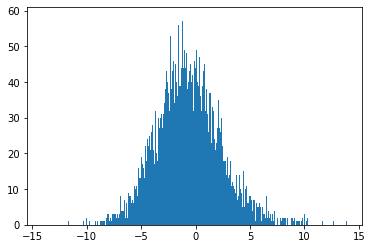

In [33]:
_=plt.hist(filtered_df["raptor_total"], bins = 1000)

In [34]:
filtered_df["Zraptor_total"] = (filtered_df["raptor_total"] - np.mean(filtered_df["raptor_total"]))/np.std(filtered_df["raptor_total"])

filtered_ps["Zraptor_total"] = (filtered_ps["raptor_total"] - np.mean(filtered_ps["raptor_total"]))/np.std(filtered_ps["raptor_total"])

/tmp/local/51409472/ipykernel_24492/583409883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Zraptor_total"] = (filtered_df["raptor_total"] - np.mean(filtered_df["raptor_total"]))/np.std(filtered_df["raptor_total"])


In [35]:
filtered_df["Value by Salary"] = filtered_df["Zraptor_total"] - filtered_df["normSalary"]
filtered_ps["Value by Salary"] = filtered_ps["Zraptor_total"] - filtered_ps["normSalary"]
filtered_df.sort_values(by = "Value by Salary")

/tmp/local/51409472/ipykernel_24492/2164179981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Value by Salary"] = filtered_df["Zraptor_total"] - filtered_df["normSalary"]


,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,pace_impact,lg,salary,normalized salary,division,season-eW,season-eF,normSalary,Zraptor_total,Value by Salary
7558,Tom Gugliotta,guglito01,2004,RS,PHX,593,304,-7.922100,-0.725091,-8.647191,...,0.277043,NBA,11670000.0,0.266195,Pacific,"(2003.0, 2012.0]","(1996.0, 2006.0]",1.546353,-2.665738,-4.212090
20820,Sharone Wright,wrighsh01,1997,RS,TOR,1926,1009,-8.311555,-1.720527,-10.032081,...,0.531985,NBA,3100000.0,0.127242,Atlantic,"(1994.0, 2003.0]","(1996.0, 2006.0]",0.803258,-3.127206,-3.930464
1187,Andrea Bargnani,bargnan01,2015,RS,NYK,1538,785,-3.152252,-4.960087,-8.112338,...,-0.251171,NBA,11500000.0,0.182352,Atlantic,"(2012.0, 2021.0]","(2014.0, 2021.0]",1.165519,-2.487516,-3.653035
19696,Martell Webster,webstma02,2015,RS,WAS,722,352,-4.026988,-6.258227,-10.285215,...,1.000870,NBA,5381750.0,0.085337,Southeast,"(2012.0, 2021.0]","(2014.0, 2021.0]",0.401086,-3.211554,-3.612640
16737,Ralph Sampson,sampsra01,1990,RS,SAC,850,417,-8.367535,1.001736,-7.365800,...,0.978481,NBA,2100000.0,0.214242,Pacific,"(1984.964, 1994.0]","(1984.999, 1996.0]",1.327771,-2.238757,-3.566528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11114,Damion Lee,leeda03,2018,RS,ATL,861,404,-0.428754,1.723946,1.295192,...,-0.036700,NBA,138240.0,0.001395,Southeast,"(2012.0, 2021.0]","(2014.0, 2021.0]",-3.740208,0.647228,4.387436
9495,Mike James,jamesmi02,2018,RS,PHX,1473,669,-0.370793,1.112517,0.741724,...,0.005097,NBA,87552.0,0.000884,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]",-4.200033,0.462803,4.662837
14038,David Nwaba,nwabada01,2017,RS,LAL,827,397,-1.044614,3.439512,2.394899,...,-0.214153,NBA,137466.0,0.001460,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]",-3.694272,1.013668,4.707940
7990,Shaquille Harrison,harrish01,2018,RS,PHX,837,384,2.211643,2.549812,4.761456,...,0.526144,NBA,267160.0,0.002696,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]",-3.076927,1.802244,4.879171


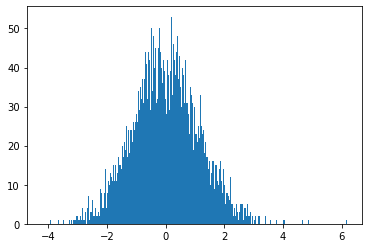

In [36]:
_ = plt.hist(filtered_df["Value by Salary"], bins = 1000)

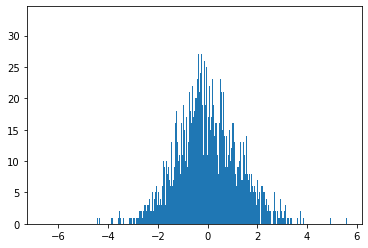

In [90]:
_ = plt.hist(filtered_ps["Value by Salary"], bins = 1000)

In [37]:
def weighted_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d*w).sum()/w.sum()

# def Zweighted_avg(df, values, weights):
#     # if weight is z-score quantity
#     d = df[values]
#     w = df[weights]
#     return np.mean(d+w)

In [38]:
Avg_ValSal_MP = filtered_df.groupby("team").apply(weighted_avg, "Value by Salary","mp")
# same thing as:
team_indicesRS = filtered_df.groupby("team").indices
team_indicesPO = filtered_ps.groupby("team").indices

# np.average(filtered_df["Value by Salary"].values[team_indicesRS["ATL"]], 
#            weights =filtered_df["mp"].values[team_indicesRS["ATL"]])


Avg_ValSal_plain = filtered_df.groupby("team").mean()["Value by Salary"]


In [39]:
# Avg_ValSal_Sal = filtered_df.groupby("team").apply(Zweighted_avg, "Value by Salary", "normSalary") 
# can't use that since its the same as mean of the Zraptor_total_column
# Avg_ValSal_Sal = filtered_df.groupby("team").apply(weighted_avg, "Value by Salary", "normalized salary") 
# doesn't make much sense to normalize when you've already normalized.

In [40]:
Avg_ValSal_team = pd.concat([Avg_ValSal_MP, Avg_ValSal_plain], axis = 1)
Avg_ValSal_team.columns = ["By Minutes Played", "Normal"]
Avg_ValSal_team

,By Minutes Played,Normal
team,,
ATL,0.034235,0.020210
BKN,-0.107173,-0.126660
BOS,0.099556,0.088099
CHA,-0.103586,-0.103048
CHI,0.112389,-0.007897
CLE,0.024905,-0.088459
DAL,0.003372,0.033208
DEN,0.073731,0.049333
DET,0.002446,-0.039410


In [41]:
filtered_df.sort_values(by = "raptor_total")

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,pace_impact,lg,salary,normalized salary,division,season-eW,season-eF,normSalary,Zraptor_total,Value by Salary
14090,Johnny O'Bryant III,obryajo01,2015,RS,MIL,736,368,-7.304477,-6.780712,-14.085189,...,-0.013722,NBA,600000.0,0.009514,Central,"(2012.0, 2021.0]","(2014.0, 2021.0]",-1.807485,-4.477768,-2.670283
375,John Amaechi,amaecjo01,1996,RS,CLE,619,357,-9.412040,-2.254551,-11.666591,...,0.886912,NBA,200000.0,0.008696,Central,"(1994.0, 2003.0]","(1984.999, 1996.0]",-1.898029,-3.671851,-1.773822
12437,Doug McDermott,mcderdo01,2015,RS,CHI,645,321,-5.055433,-6.375180,-11.430613,...,0.437024,NBA,2277960.0,0.036121,Central,"(2012.0, 2021.0]","(2014.0, 2021.0]",-0.464420,-3.593220,-3.128800
6446,Channing Frye,fryech01,2019,RS,CLE,696,341,-3.533367,-7.891169,-11.424536,...,-0.283123,NBA,2393887.0,0.023500,Central,"(2012.0, 2021.0]","(2014.0, 2021.0]",-0.897190,-3.591195,-2.694004
11015,Priest Lauderdale,laudepr01,1998,RS,DEN,652,345,-7.975123,-2.430192,-10.405315,...,1.347942,NBA,630000.0,0.023420,Northwest,"(1994.0, 2003.0]","(1996.0, 2006.0]",-0.900606,-3.251573,-2.350968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,Stephen Curry,curryst01,2015,RS,GSW,5524,2613,9.472839,2.259681,11.732520,...,3.016670,NBA,10629213.0,0.168544,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]",1.086249,4.125117,3.038868
9455,LeBron James,jamesle01,2009,RS,CLE,5708,3054,8.683624,3.254920,11.938544,...,-0.372676,NBA,14410581.0,0.245579,Central,"(2003.0, 2012.0]","(2006.0, 2014.0]",1.465200,4.193767,2.728567
10280,Michael Jordan,jordami01,1991,RS,CHI,6112,3034,8.835103,3.120694,11.955797,...,-0.065169,NBA,2500000.0,0.210597,Central,"(1984.964, 1994.0]","(1984.999, 1996.0]",1.310497,4.199517,2.889020
14706,Chris Paul,paulch01,2009,RS,NOP,5554,3002,8.736417,3.946163,12.682580,...,-0.255093,NBA,4574189.0,0.077951,Southwest,"(2003.0, 2012.0]","(2006.0, 2014.0]",0.309961,4.441693,4.131731


Most are the same but CHI goes from - to + when normalized by mp by effecting making the effect of high-paid, injured players negligble in the data. Ex D-Rose ACL tear?

<AxesSubplot:xlabel='Zraptor_total', ylabel='Density'>

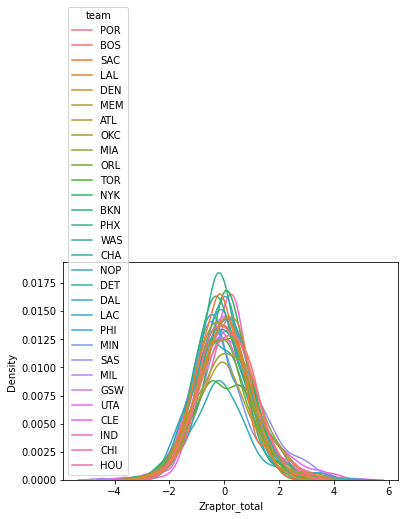

In [42]:
sns.kdeplot(data = filtered_df, x ="Zraptor_total", hue = "team")

Overall, very low differences between teams.

In [43]:
valDol_year_team = filtered_df.groupby(by = ["season", "team"]).apply(lambda x: np.mean(x["Value by Salary"])).reset_index()
valDol_year_team.columns = ["season", "team", "Best Value"]
valDol_year_team

,season,team,Best Value
0,1985,ATL,-0.219774
1,1985,BKN,-0.259994
2,1985,BOS,-0.474109
3,1985,CHI,-0.762538
4,1985,CLE,-0.141893
...,...,...,...
1007,2021,SAC,0.158845
1008,2021,SAS,-0.005701
1009,2021,TOR,0.753048
1010,2021,UTA,0.707336


In [44]:
print(Avg_ValSal_team.index)

Index(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
       'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK',
       'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'],
      dtype='object', name='team')


In [45]:
teams_div = ["BOS", "BKN", "NYK", "PHI", "TOR", 
             "CHI", "CLE", "DET", "IND", "MIL",  
             "ATL", "CHA", "MIA", "ORL", "WAS",
             "DEN", "MIN", "OKC", "POR", "UTA",
             "GSW", "LAC", "LAL", "PHX", "SAC",
             "DAL", "HOU", "MEM", "NOP", "SAS"]

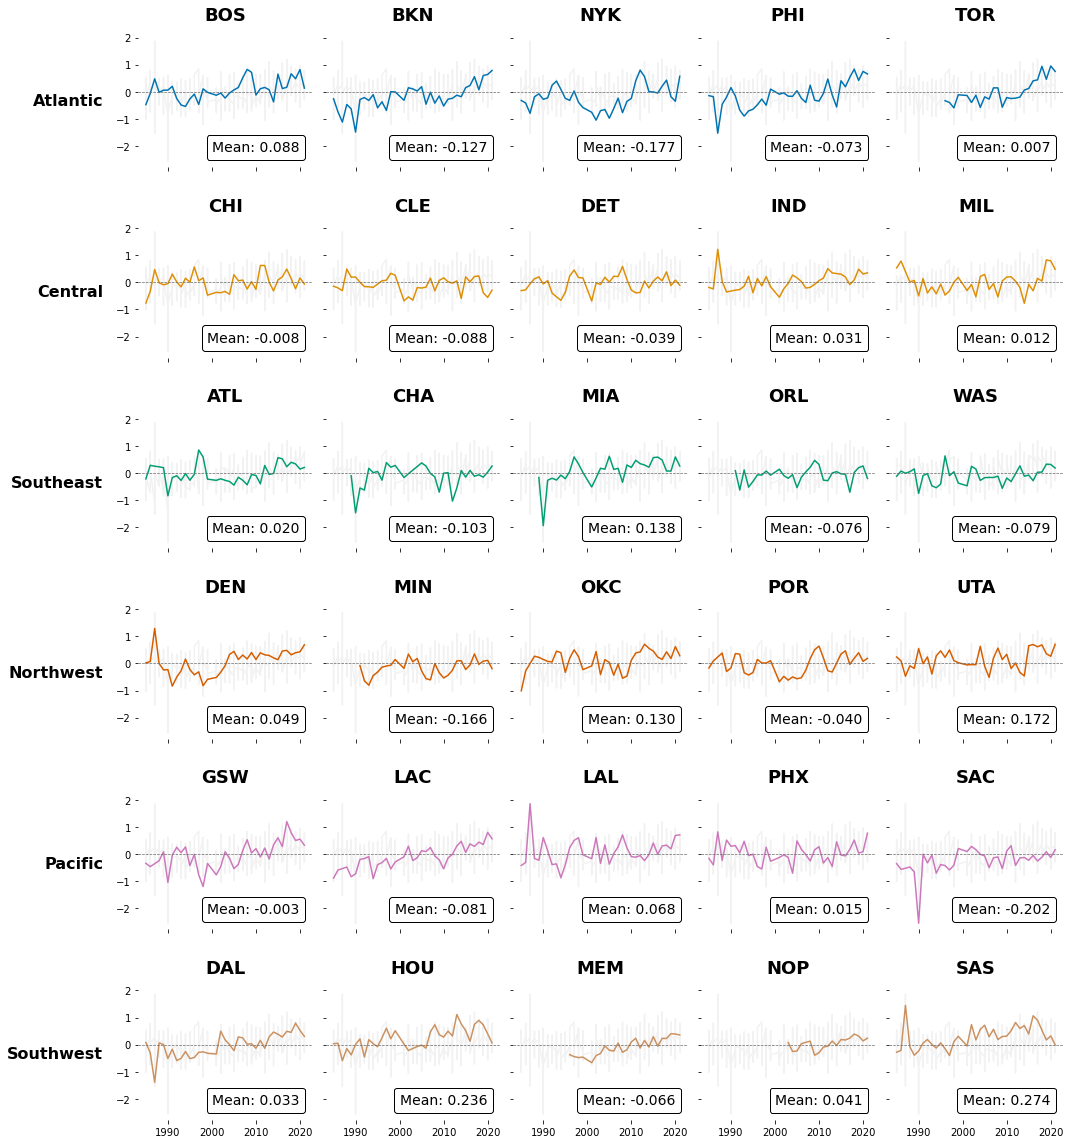

In [113]:
# sns.lineplot(data = valDol_year_team, x = "season", y = 'Best Value', hue = "team")
from matplotlib.offsetbox import AnchoredText

nrow = 6; ncol = 5;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize = (15,16), sharex =True, sharey =True)
count = 0

for i in range(30):
    ax = axs.reshape(-1)[i]
    team = teams_div[i]
    t_mask = valDol_year_team["team"] == team
    ax.plot(valDol_year_team[~t_mask]["season"], valDol_year_team[~t_mask]["Best Value"], c = "grey", alpha = 0.1)
    val = i // 5
    ax.plot(valDol_year_team[t_mask]["season"], valDol_year_team[t_mask]["Best Value"], c = sns.color_palette("colorblind", 6)[val], alpha = 1.0)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize= 14)
#     ax.set_yticklabels(ax.get_yticklabels(), fontsize= 14)
    ax.axhline(0, ls = "--", linewidth = .7, color = "dimgrey")
    mean_val = Avg_ValSal_team["Normal"].loc[team]
    ax.set_title("{}".format(team), size = 18, style = "normal", weight = "bold", pad = 15)
    at = AnchoredText("Mean: {:.3f}".format(mean_val), prop=dict(size=14), frameon=True, loc='lower right')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    pad = 5
    if (i%5 ==0):
        ax.annotate(div_order[count], xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                              xycoords=ax.yaxis.label, textcoords='offset points',
                              size=16, weight = "bold", ha='right', va='center')
        count +=1
                            

# plt.suptitle("Player Values By Teams (1985-2021)", size = 14, style = "normal", weight = "bold", y = 1.005)

plt.tight_layout(h_pad = 3, )

plt.savefig("ManneY_4.png", dpi = 400, bbox_inches = "tight")

In [47]:
sns.color_palette("colorblind", 6)[0]

(0.00392156862745098, 0.45098039215686275, 0.6980392156862745)

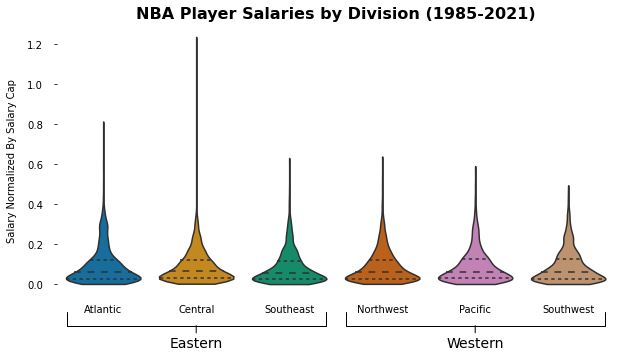

In [51]:
div_order = ["Atlantic", "Central", "Southeast", "Northwest", "Pacific", "Southwest"]
fig = plt.figure(figsize = (10,5))
ax =sns.violinplot(data = filtered_df, x ="division", y = "normalized salary", 
               cut = 0, inner = "quartiles", order = div_order, scale = "width", palette = "colorblind")
# ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 90)
ax.tick_params(axis = "x", pad=5, which='both', bottom = False)
ax.tick_params(axis = "y", pad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("Salary Normalized By Salary Cap", labelpad = 10)
ax.set_title("NBA Player Salaries by Division (1985-2021)", size = 16, style = "normal", weight = "bold")
fs = 14

ax.annotate('Eastern', xy=(0.25, -.1), xytext=(0.25, -.2), xycoords='axes fraction', 
            fontsize=fs*1, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=9.25, lengthB=1', lw=1))
ax.annotate('Western', xy=(0.75, -.1), xytext=(0.75, -.2), xycoords='axes fraction', 
            fontsize=fs*1, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=9.25, lengthB=1', lw=1))

plt.savefig("ManneY_1a.png", dpi = 400, bbox_inches = "tight")

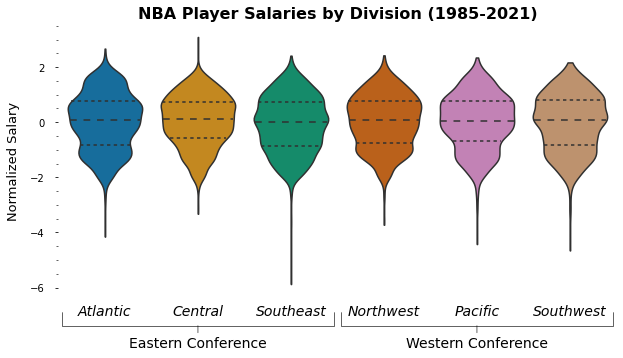

In [110]:
div_order = ["Atlantic", "Central", "Southeast", "Northwest", "Pacific", "Southwest"]
fig = plt.figure(figsize = (10,5))
ax = sns.violinplot(data = filtered_df, x ="division", y = "normSalary", 
               cut = 0, inner = "quartiles", order = div_order, scale = "width", palette = "colorblind")
# ax.set_facecolor("lightgreen")
# ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 90)
ax.tick_params(axis = "x", pad=5, which='both', bottom = False)
ax.tick_params(axis = "y", pad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 14, style = "italic")
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.set_xlabel("")
ax.set_ylabel("Normalized Salary", size = 13, labelpad = 10)
ax.set_title("NBA Player Salaries by Division (1985-2021)", size = 16, style = "normal", weight = "bold")
fs = 14

ax.annotate('Eastern Conference', xy=(0.25, -.1), xytext=(0.25, -.2), xycoords='axes fraction', 
            fontsize=fs*1, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=9.7, lengthB=1', lw=0.6))
ax.annotate('Western Conference', xy=(0.75, -.1), xytext=(0.75, -.2), xycoords='axes fraction', 
            fontsize=fs*1, ha='center', va='bottom', style = "normal",
            arrowprops=dict(arrowstyle='-[, widthB=9.7, lengthB=1', lw=0.6))

plt.savefig("ManneY_1a.png", transparent = True,dpi = 400, bbox_inches = "tight")

In [53]:
filtered_df.columns

Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact', 'lg', 'salary',
       'normalized salary', 'division', 'season-eW', 'season-eF', 'normSalary',
       'Zraptor_total', 'Value by Salary'],
      dtype='object')

In [55]:
filtered_df.sort_values(by = "normSalary")

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,pace_impact,lg,salary,normalized salary,division,season-eW,season-eF,normSalary,Zraptor_total,Value by Salary
12699,Jordan McRae,mcraejo01,2019,RS,WAS,742,333,0.875000,-0.638692,0.236308,...,-0.237115,NBA,17092.0,0.000168,Southeast,"(2012.0, 2021.0]","(2014.0, 2021.0]",-5.872440,0.294390,6.166830
10208,Mason Jones,jonesma05,2021,RS,HOU,679,307,-2.864715,-5.685737,-8.550452,...,1.094377,NBA,61528.0,0.000564,Southwest,"(2012.0, 2021.0]","(2014.0, 2021.0]",-4.652364,-2.633503,2.018861
2574,Jabari Brown,brownja01,2015,RS,LAL,1132,568,-2.633049,-4.973830,-7.606879,...,-0.021355,NBA,44765.0,0.000710,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]",-4.420417,-2.319089,2.101328
9495,Mike James,jamesmi02,2018,RS,PHX,1473,669,-0.370793,1.112517,0.741724,...,0.005097,NBA,87552.0,0.000884,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]",-4.200033,0.462803,4.662837
360,Rafer Alston,alstora01,2003,RS,TOR,1857,980,0.620746,-1.573049,-0.952303,...,0.672983,NBA,37344.0,0.000927,Atlantic,"(1994.0, 2003.0]","(1996.0, 2006.0]",-4.151342,-0.101674,4.049668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6576,Kevin Garnett,garneke01,2004,RS,MIN,6060,3231,5.044893,4.633476,9.678369,...,-0.915668,NBA,28000000.0,0.638686,Northwest,"(2003.0, 2012.0]","(1996.0, 2006.0]",2.427413,3.440640,1.013227
5938,Patrick Ewing,ewingpa01,1998,RS,NYK,1576,848,-1.479166,3.612752,2.133586,...,-0.319480,NBA,20500000.0,0.762082,Atlantic,"(1994.0, 2003.0]","(1996.0, 2006.0]",2.605240,0.926595,-1.678645
5934,Patrick Ewing,ewingpa01,1996,RS,NYK,5337,2783,-2.932157,3.810679,0.878522,...,-0.382933,NBA,18724000.0,0.814087,Atlantic,"(1994.0, 2003.0]","(1984.999, 1996.0]",2.671696,0.508387,-2.163310
10292,Michael Jordan,jordami01,1998,RS,CHI,5966,3181,3.850500,1.702543,5.553043,...,-0.437569,NBA,33140000.0,1.231970,Central,"(1994.0, 2003.0]","(1996.0, 2006.0]",3.088781,2.066014,-1.022768
